In [1]:
from sklearn.metrics import accuracy_score, recall_score, roc_curve, auc, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
# 题目三、通过已有的员工离职预测模型来搭建相应的员工离职预测模型，预测之后的员工是否会离职。（20分）。

# 1.首先读取员工信息以及其交易离职表现，即是否离职记录（1分）
import pandas as pd

data = pd.read_excel('E:\\python代码\\lx-yk\\data-yk\\yk5\\员工离职预测模型.xlsx')
print(data)
'''
      工资  满意度  考核得分  工程数量  月工时  工龄  离职
0      低  3.8  0.53     2  157   3   1
1      中  8.0  0.86     5  262   6   1
2      中  1.1  0.88     7  272   4   1
3      低  7.2  0.87     5  223   5   1
4      低  3.7  0.52     2  159   3   1
'''
# 2.处理文本内容：'低': 0, '中': 1, '高': 2。（1分）
data['工资']=data['工资'].map({'低': 0, '中': 1, '高': 2})

# 3.提取特征变量和目标变量（1分）
x=data.iloc[:,:-1]
y=data['离职']
# 4.划分训练集和测试集，并自主选择两种分类算法，及参数调优（8分）
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
#逻辑回归
from sklearn.linear_model import LogisticRegression
lj = LogisticRegression()
lj.fit(X_train, y_train)
lj_yc =lj.predict(X_test)


#逻辑回归参数
lj_cs={'C': [0.1, 1, 10]}
# 逻辑回归调优

lr_ty = GridSearchCV(lj, lj_cs,cv=5)
lr_ty.fit(X_train, y_train)
逻辑回归最佳估计器=lr_ty.best_estimator_
print('逻辑回归最佳估计器',逻辑回归最佳估计器)
#随机森林
from sklearn.ensemble import RandomForestClassifier
sj_tree = RandomForestClassifier()
sj_tree.fit(X_train, y_train)
sj_yc =sj_tree.predict(X_test)
#随机森林参数
sj_cs={'n_estimators': [50, 100, 150],'max_depth': [None, 5, 10]}
# 随机森林调优
print("\n",'\n')
sj_ty= GridSearchCV(sj_tree, sj_cs,cv=5)
sj_ty.fit(X_train, y_train)
随机森林最佳估计器=sj_ty.best_estimator_
# 随机森林最佳参数组合=sj_ty.best_params_
# 最佳模型在交叉验证中的得分=sj_ty.best_score_
# 最佳结果的索引=sj_ty.best_index_
print('随机森林最佳估计器',随机森林最佳估计器)
# print('随机森林最佳参数组合',随机森林最佳参数组合)
# print('随机森林最佳模型在交叉验证中的得分',最佳模型在交叉验证中的得分)
# print('随机森林最佳结果的索引',最佳结果的索引)

# 5.使用至少两种指标评估模型，打印模型的特征权重，绘制ROC曲线（8分）
lr_pred = 逻辑回归最佳估计器.predict(X_test)
rf_pred = 随机森林最佳估计器.predict(X_test)

lr_acc = accuracy_score(y_test,lr_pred),
lr_re = recall_score(y_test, lr_pred)

rf_acc = accuracy_score(y_test,rf_pred),
rf_re = recall_score(y_test, rf_pred)

print("逻辑回归特征权重：", 逻辑回归最佳估计器.coef_)
print("随机森林特征权重：", 随机森林最佳估计器.feature_importances_)

#绘制ROC曲线
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

      工资  满意度  考核得分  工程数量  月工时  工龄  离职
0      低  3.8  0.53     2  157   3   1
1      中  8.0  0.86     5  262   6   1
2      中  1.1  0.88     7  272   4   1
3      低  7.2  0.87     5  223   5   1
4      低  3.7  0.52     2  159   3   1
...   ..  ...   ...   ...  ...  ..  ..
14995  高  9.0  0.55     3  259  10   0
14996  高  7.4  0.95     5  266  10   0
14997  高  8.5  0.54     3  185  10   0
14998  高  3.3  0.65     3  172  10   0
14999  低  5.0  0.73     4  180   3   0

[15000 rows x 7 columns]


D:\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Jupyter\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


逻辑回归最佳估计器 LogisticRegression(C=0.1)

 

随机森林最佳估计器 RandomForestClassifier()
逻辑回归特征权重： [[-0.71937906 -0.40874845  0.49848518 -0.27847226  0.00439227  0.23127178]]
随机森林特征权重： [0.00850729 0.35183787 0.1201229  0.17555102 0.15691015 0.18707077]


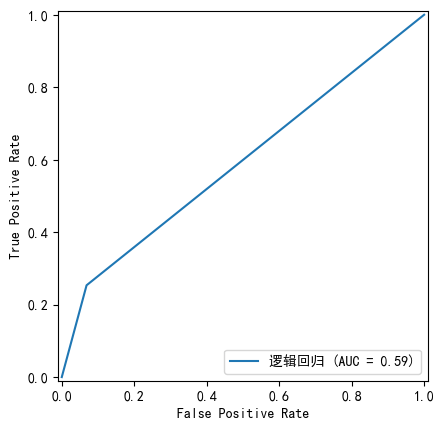

In [2]:
#逻辑回归
fpr, tpr, thresholds = roc_curve(y_test,lr_ty.predict(X_test))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name='逻辑回归')
display.plot()
plt.show()

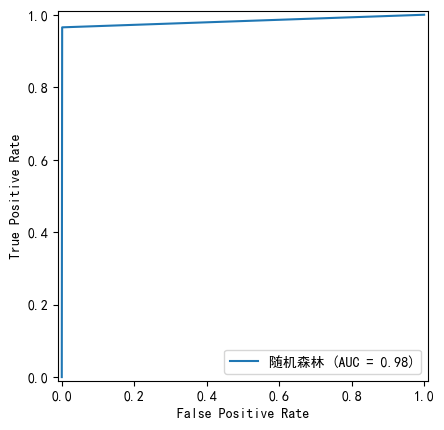

In [3]:
#随机森林
fpr, tpr, thresholds = roc_curve(y_test,sj_ty.predict(X_test))
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr,roc_auc=roc_auc,estimator_name='随机森林')
display.plot()
plt.show()



In [11]:
# 6.使用较优模型预测样本数据，并保存结果到CSV (1分)
#逻辑回归
t6lj_yc=逻辑回归最佳估计器.predict(X_test)
l6=pd.DataFrame(t6lj_yc)
l6.to_csv("t6_lj.csv")

In [12]:
#随机森林
t6sj_yc=随机森林最佳估计器.predict(X_test)
l61=pd.DataFrame(t6sj_yc)
l61.to_csv("t6_sj.csv")